In [47]:
!pip install wordcloud
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

%matplotlib inline

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/ac/66/937d1d73389c0b501c928c4d8513653063d2b40272dff70d0e283d8b9144/wordcloud-1.9.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 2.2 MB/s eta 0:00:00a 0:00:01


In [13]:
IT = pd.read_csv("insider_trading data.csv")

In [100]:
IT.head()

,Company,Filing Date,Trade Date,Ticker,Insider Name,Title,Transaction Type,Price,Quantity,Owned,Change of Amount Owned,Value,Date Filed Open,Date Filed Close,Date Traded Open,Date Traded Close
3,0 Relic Inc.,10/11/2020 19:13,2020-11-10,0R,Henshall David J,Dir,P - Purchase,54.74,4750,4750,0.0,260009,55.450001,53.730000,55.450001,53.730000
70,0 Residential Investment Corp.,23/11/2021 16:17,2021-11-23,NRZ,McGinnis Robert,Dir,P - Purchase,25.18,4000,4000,0.0,100726,11.200000,11.190000,11.200000,11.190000
749,Abercrombie & Fitch Co /de/,17/03/2021 10:08,2021-03-15,ANF,Coulter Suzanne M,Dir,P - Purchase,34.61,2170,2170,0.0,75104,36.009998,36.880001,34.200001,36.189999
957,Acco Brands Corp,16/11/2020 11:48,2020-11-13,ACCO,Lombardi Ronald M.,Dir,P - Purchase,6.83,50000,50000,0.0,341745,7.130000,7.790000,6.800000,6.890000
967,Acco Brands Corp,3/11/2021 16:22,2021-11-02,ACCO,Jones Angela Y,SVP Global Chief People Offic,P - Purchase,8.44,1150,1150,0.0,9706,8.350000,8.720000,8.540000,8.380000


In [15]:
IT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37709 entries, 0 to 37708
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company                 37709 non-null  object 
 1   Filing Date             37709 non-null  object 
 2   Trade Date              37709 non-null  object 
 3   Ticker                  37709 non-null  object 
 4   Insider Name            37709 non-null  object 
 5   Title                   37709 non-null  object 
 6   Transaction Type        37709 non-null  object 
 7   Price                   37709 non-null  float64
 8   Quantity                37709 non-null  int64  
 9   Owned                   37709 non-null  int64  
 10  Change of Amount Owned  37709 non-null  object 
 11  Value                   37709 non-null  int64  
 12  Date Filed Open         37709 non-null  float64
 13  Date Filed Close        37709 non-null  float64
 14  Date Traded Open        37709 non-null

In [99]:
IT = IT.dropna()
IT = IT.drop_duplicates()
IT.head()

,Company,Filing Date,Trade Date,Ticker,Insider Name,Title,Transaction Type,Price,Quantity,Owned,Change of Amount Owned,Value,Date Filed Open,Date Filed Close,Date Traded Open,Date Traded Close
3,0 Relic Inc.,10/11/2020 19:13,2020-11-10,0R,Henshall David J,Dir,P - Purchase,54.74,4750,4750,0.0,260009,55.450001,53.730000,55.450001,53.730000
70,0 Residential Investment Corp.,23/11/2021 16:17,2021-11-23,NRZ,McGinnis Robert,Dir,P - Purchase,25.18,4000,4000,0.0,100726,11.200000,11.190000,11.200000,11.190000
749,Abercrombie & Fitch Co /de/,17/03/2021 10:08,2021-03-15,ANF,Coulter Suzanne M,Dir,P - Purchase,34.61,2170,2170,0.0,75104,36.009998,36.880001,34.200001,36.189999
957,Acco Brands Corp,16/11/2020 11:48,2020-11-13,ACCO,Lombardi Ronald M.,Dir,P - Purchase,6.83,50000,50000,0.0,341745,7.130000,7.790000,6.800000,6.890000
967,Acco Brands Corp,3/11/2021 16:22,2021-11-02,ACCO,Jones Angela Y,SVP Global Chief People Offic,P - Purchase,8.44,1150,1150,0.0,9706,8.350000,8.720000,8.540000,8.380000


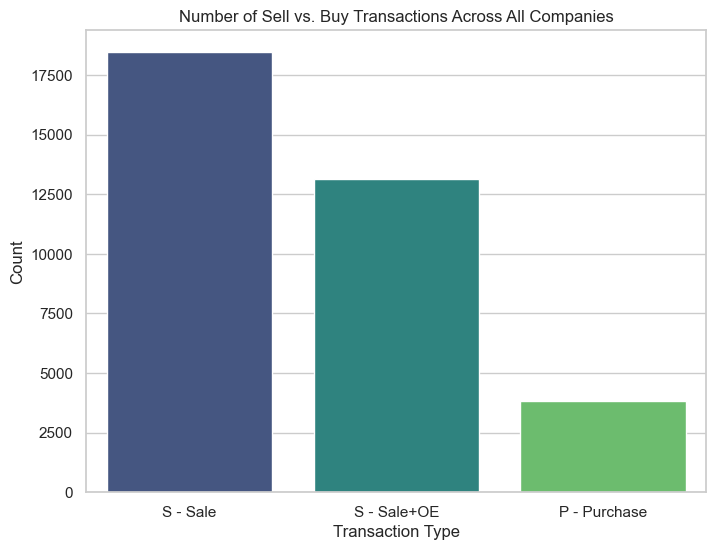

In [96]:
transaction_counts = IT['Transaction Type'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=transaction_counts.index, y=transaction_counts.values, palette='viridis')
plt.title('Number of Sell vs. Buy Transactions Across All Companies')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

In [22]:
# Highest trading activity and changes in ownership
total_value_by_company = IT.groupby('Company').agg({'Value': 'sum', 'Owned': 'sum'}).reset_index()
total_value_by_company

,Company,Value,Owned
0,0 Relic Inc.,-80432667,191882996
1,0 Residential Investment Corp.,1110726,1199119
2,0ell Brands Inc.,-276092213,33228033
3,0link Genetics Corp,-517776,5464320
4,0mark Group Inc.,14508684,71725031
...,...,...,...
1191,Zoetis Inc.,-97849215,1312669
1192,Zogenix Inc.,-74483,276608
1193,Zoom Video Communications Inc.,-595704310,3335331
1194,Zscaler Inc.,-296818630,133166414


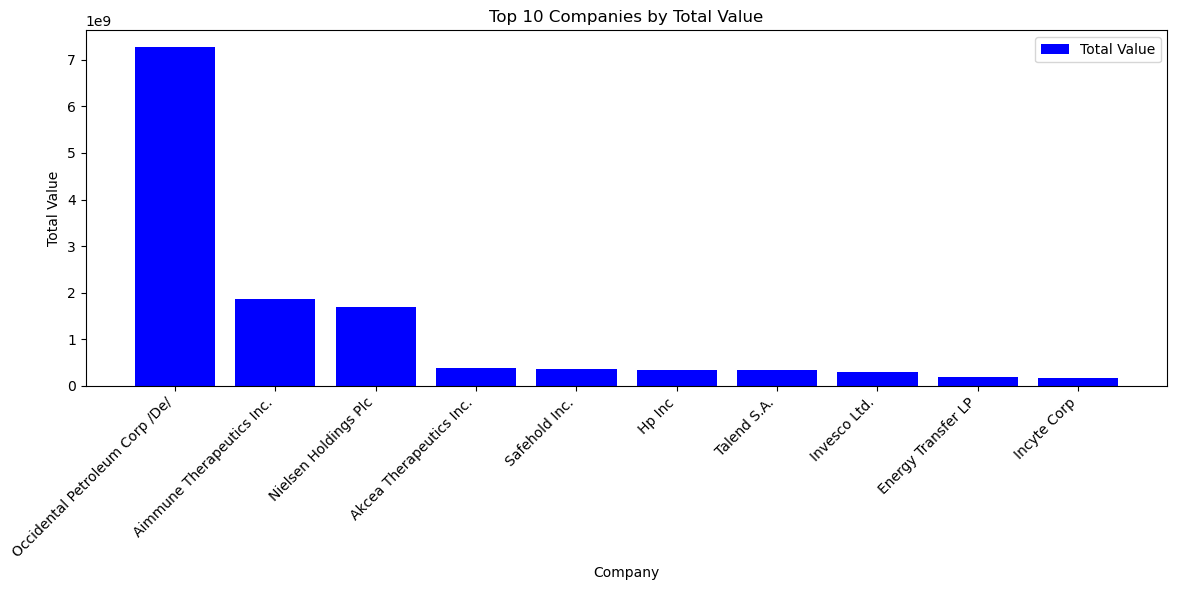

In [32]:
# Top 10 Companies with the highest Value
top_n = 10  
top_companies = total_value_by_company.nlargest(top_n, 'Value')
plt.figure(figsize=(12, 6))
plt.bar(top_companies['Company'], top_companies['Value'], color='blue', label='Total Value')
plt.xlabel('Company')
plt.ylabel('Total Value')
plt.title(f'Top {top_n} Companies by Total Value')
plt.legend()
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()
# The graph represents the the companies with the highest total value
 # Focusing on th emost significant contributors

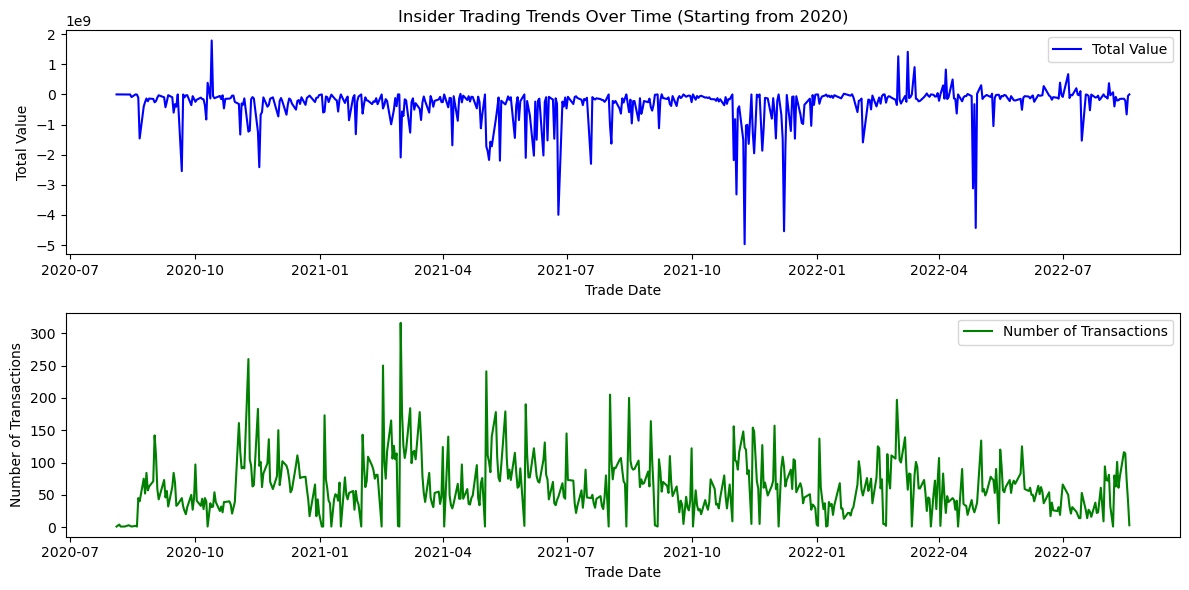

In [43]:
IT['Trade Date'] = pd.to_datetime(IT['Trade Date'],format='%d/%m/%Y')
start_date = pd.to_datetime('2020-08-01')
IT_recent = IT[IT['Trade Date'] >= start_date]
insider_trading_trends = IT_recent.groupby('Trade Date').agg({'Value': 'sum', 'Transaction Type': 'count'}).reset_index()
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(insider_trading_trends['Trade Date'], insider_trading_trends['Value'], label='Total Value', color='blue')
plt.title('Insider Trading Trends Over Time (Starting from 2020)')
plt.xlabel('Trade Date')
plt.ylabel('Total Value')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(insider_trading_trends['Trade Date'], insider_trading_trends['Transaction Type'], label='Number of Transactions', color='green')
plt.xlabel('Trade Date')
plt.ylabel('Number of Transactions')
plt.legend()

plt.tight_layout()
plt.show()



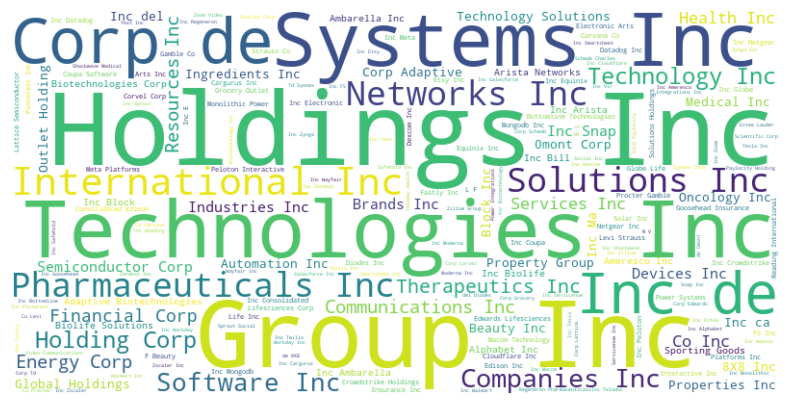

In [54]:
company_names = IT['Company']

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(company_names))

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

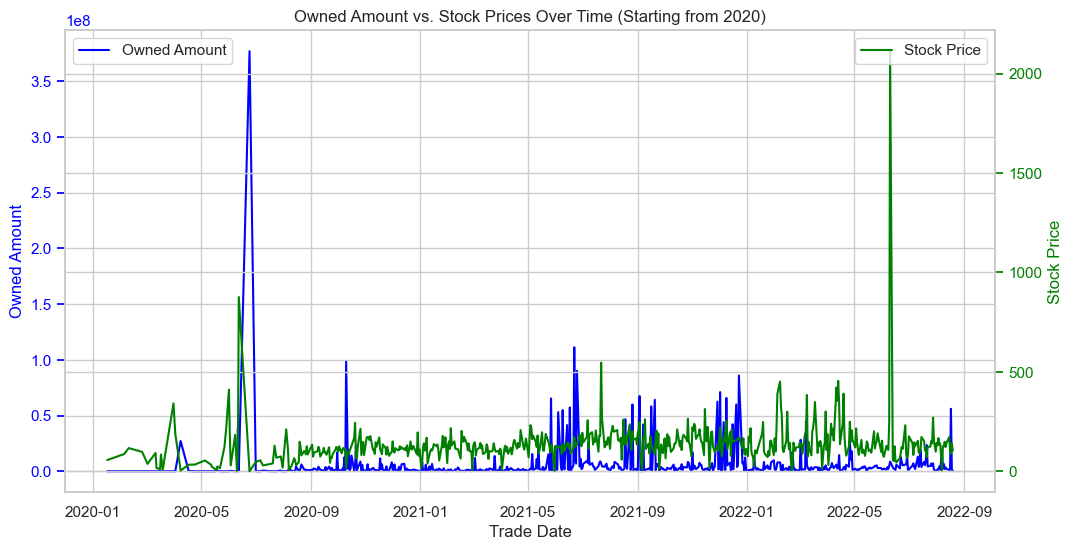

In [59]:
IT['Trade Date'] = pd.to_datetime(IT['Trade Date'], format='%d/%m/%Y')

# Set the starting date to focus on significant change (e.g., starting from the year 2020)
start_date = pd.to_datetime('2020-01-01')

# Filter the DataFrame for entries after the starting date
IT_recent = IT[IT['Trade Date'] >= start_date]

# Group by 'Trade Date' and calculate the mean owned amount and stock price for each date
ownership_stock_trends = IT_recent.groupby('Trade Date').agg({'Owned': 'mean', 'Price': 'mean'}).reset_index()

# Set Seaborn style
sns.set(style="whitegrid")

# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot 'Owned' on the primary y-axis
sns.lineplot(x='Trade Date', y='Owned', data=ownership_stock_trends, label='Owned Amount', color='blue', ax=ax1)
ax1.set_xlabel('Trade Date')
ax1.set_ylabel('Owned Amount', color='blue')
ax1.tick_params('y', colors='blue')
ax1.legend(loc='upper left')

# Create a secondary y-axis for 'Price'
ax2 = ax1.twinx()
sns.lineplot(x='Trade Date', y='Price', data=ownership_stock_trends, label='Stock Price', color='green', ax=ax2)
ax2.set_ylabel('Stock Price', color='green')
ax2.tick_params('y', colors='green')
ax2.legend(loc='upper right')

plt.title('Owned Amount vs. Stock Prices Over Time (Starting from 2020)')
plt.show()

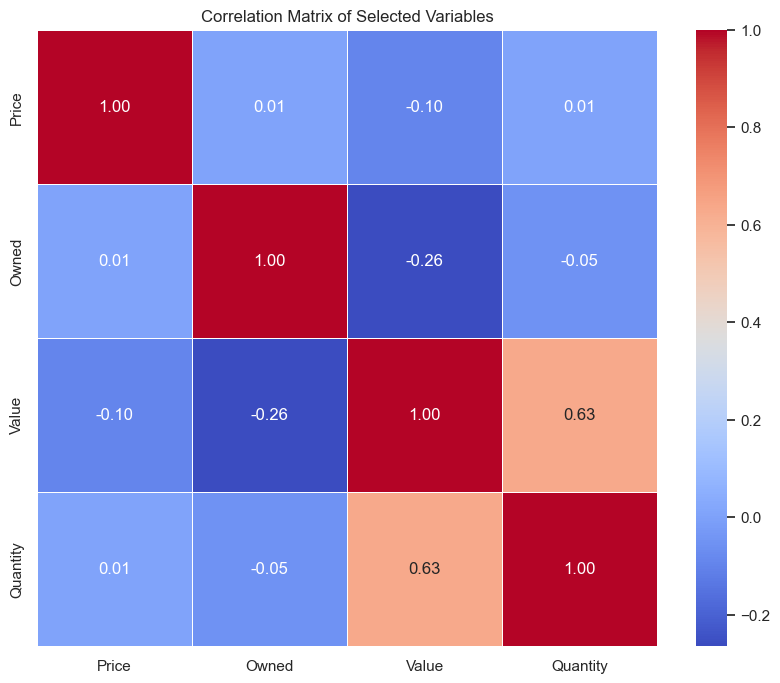

In [67]:
# Select relevant columns for correlation analysis
selected_columns = ['Price', 'Owned', 'Value','Quantity']

# Convert each column to numeric separately
for col in selected_columns:
    IT[col] = pd.to_numeric(IT[col], errors='coerce')

# Create a correlation matrix
correlation_matrix = IT[selected_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix of Selected Variables')
plt.show()

Company of Interest: Occidental Petroleum Corp /De/
Total Value for Occidental Petroleum Corp /De/: 7270364068


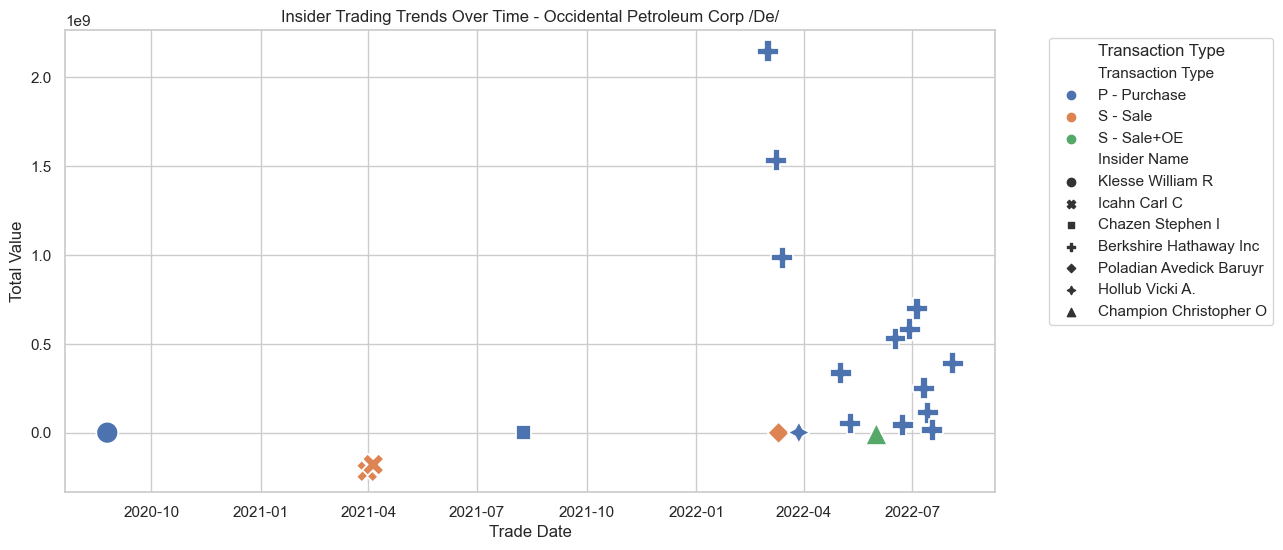

In [72]:
company_of_interest = 'Occidental Petroleum Corp /De/'

# Filter the data for the company 
company_data = IT[IT['Company'] == company_of_interest]

# Display basic information about the selected company
print(f"Company of Interest: {company_of_interest}")
print(f"Total Value for {company_of_interest}: {company_data['Value'].sum()}")

# Perform specific analyses on the company data
# Example: Plotting insider trading trends over time with transaction details
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Trade Date', y='Value', hue='Transaction Type', style='Insider Name', data=company_data, s=250)
plt.title(f'Insider Trading Trends Over Time - {company_of_interest}')
plt.xlabel('Trade Date')
plt.ylabel('Total Value')
plt.legend(title='Transaction Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [86]:

company_of_interest = 'Occidental Petroleum Corp /De/'

# Filter the data company
company_data = IT[IT['Company'] == company_of_interest]
company_data.drop('Change of Amount Owned', axis=1, inplace=True)
company_data

/var/folders/4h/pv4pym9j7v12tn6b524n15rc0000gn/T/ipykernel_52305/2005272564.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data.drop('Change of Amount Owned', axis=1, inplace=True)


,Company,Filing Date,Trade Date,Ticker,Insider Name,Title,Transaction Type,Price,Quantity,Owned,Value,Date Filed Open,Date Filed Close,Date Traded Open,Date Traded Close
25173,Occidental Petroleum Corp /De/,26/08/2020 18:15,2020-08-25,OXY,Klesse William R,Dir,P - Purchase,13.43,10000,168092,134300,13.420000,12.960000,13.810000,13.510000
25174,Occidental Petroleum Corp /De/,2/4/2021 17:06,2021-03-31,OXY,Icahn Carl C,10%,S - Sale,27.15,-8000000,80627271,-217200000,0.000000,0.000000,27.330000,26.620001
25175,Occidental Petroleum Corp /De/,7/4/2021 17:15,2021-04-05,OXY,Icahn Carl C,10%,S - Sale,25.65,-7000000,73627271,-179550000,25.490000,25.299999,27.000000,25.309999
25176,Occidental Petroleum Corp /De/,10/8/2021 17:57,2021-08-09,OXY,Chazen Stephen I,Dir,P - Purchase,25.76,20000,289597,515200,25.709999,26.260000,25.620001,25.610001
25177,Occidental Petroleum Corp /De/,4/3/2022 20:34,2022-03-02,OXY,Berkshire Hathaway Inc,10%,P - Purchase,50.88,61351818,91262995,2147483647,48.459999,56.150002,48.529999,48.369999
25178,Occidental Petroleum Corp /De/,11/3/2022 21:04,2022-03-09,OXY,Berkshire Hathaway Inc,10%,P - Purchase,56.60,27107389,118370384,1534168236,56.740002,57.950001,51.830002,57.500000
25179,Occidental Petroleum Corp /De/,15/03/2022 18:31,2022-03-11,OXY,Poladian Avedick Baruyr,Dir,S - Sale,57.23,-20000,63066,-1144600,52.910000,54.529999,56.740002,57.950001
25180,Occidental Petroleum Corp /De/,16/03/2022 19:50,2022-03-14,OXY,Berkshire Hathaway Inc,10%,P - Purchase,54.41,18102616,136473000,984959813,53.830002,52.990002,55.750000,55.590000
25181,Occidental Petroleum Corp /De/,30/03/2022 16:58,2022-03-28,OXY,Hollub Vicki A.,Pres CEO,P - Purchase,56.24,14191,490672,798102,58.310001,57.480000,56.820000,56.639999
25182,Occidental Petroleum Corp /De/,4/5/2022 20:27,2022-05-02,OXY,Berkshire Hathaway Inc,10%,P - Purchase,57.11,5887618,142360618,336223675,60.619999,61.570000,54.529999,58.299999


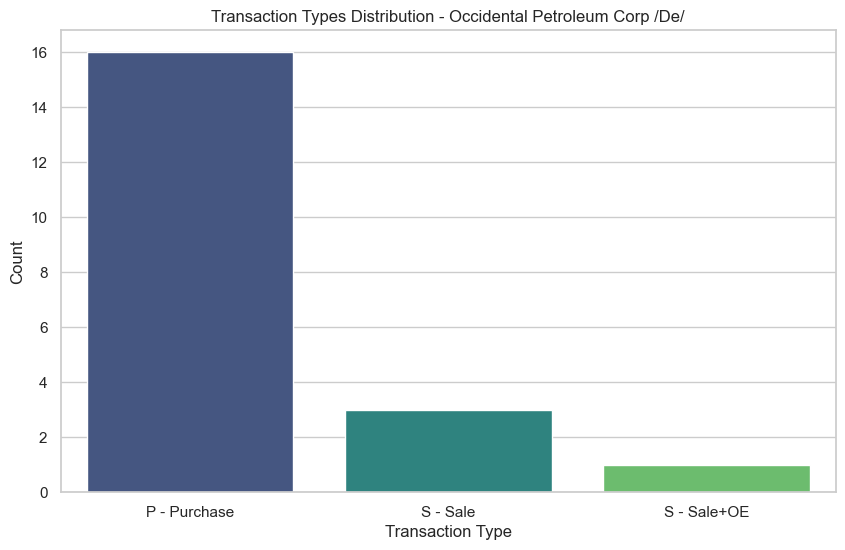

In [90]:
# Bar Graph for transaction types of distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Transaction Type', data=company_data, palette='viridis')
plt.title('Transaction Types Distribution - Occidental Petroleum Corp /De/')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

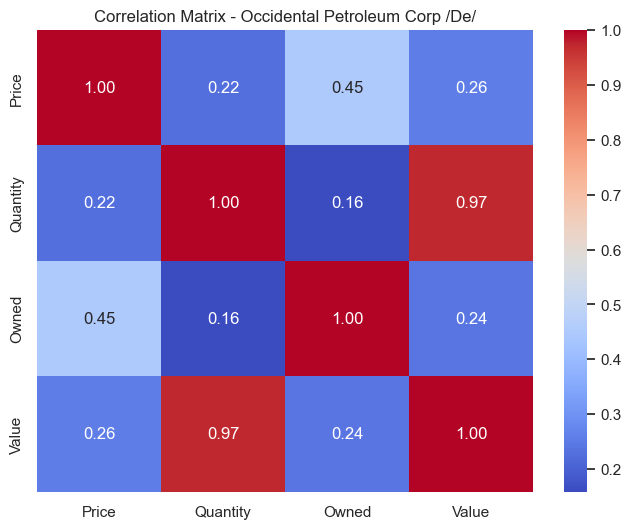

In [91]:
#correlation matrix of company
correlation_matrix = company_data[['Price', 'Quantity', 'Owned', 'Value']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Occidental Petroleum Corp /De/')
plt.show()

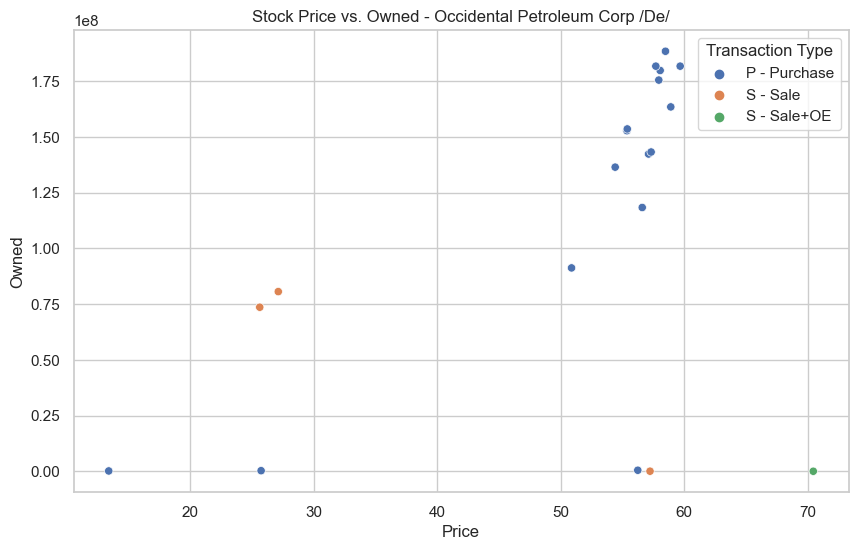

In [95]:
# graph to show the stock price vs owned
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Owned', hue='Transaction Type', data=company_data)
plt.title('Stock Price vs. Owned - Occidental Petroleum Corp /De/')
plt.xlabel('Price')
plt.ylabel('Owned')
plt.legend(title='Transaction Type')
plt.show()

In [107]:
top_insiders_value = IT.groupby(['Insider Name', 'Company'])['Value'].sum().reset_index()
top_insiders_value = top_insiders_value.sort_values(by='Value', ascending=False)

print("Top Insiders by Total Value of Transactions with Associated Companies:")
top_insiders_value.head(10)

Top Insiders by Total Value of Transactions with Associated Companies:


,Insider Name,Company,Value
199,Wilder C John,Evergy Inc.,113177322
174,Slta V (Gp) L.L.C.,Twitter Inc.,93511901
109,Loeb Daniel S,Sentinelone Inc.,81131641
69,Genesis Park II LP,Redwire Corp,10000000
148,Pinsley Howard M,Espey Mfg & Electronics Corp,5487000
132,Murphy Peggy A,Espey Mfg & Electronics Corp,5487000
153,Ready William J,Pinterest Inc.,5000009
159,Sceti Elio Leoni,Kraft Heinz Co,2989630
112,Magro Charles V.,Corteva Inc.,2556763
166,Shapiro Edward,United Airlines Holdings Inc.,2235273
